<a href="https://colab.research.google.com/github/AdrianAasen/AQT/blob/main/AQT_Entangelment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mixed state entangelment 
## Sheet 5, problem 1
AQT 2022

In [1]:
# load standard libraries
import numpy as np   # standard numerics library
import matplotlib.pyplot as plt   # for making plots
from numpy import linalg as LA #Linear algebra library

%matplotlib inline

In [2]:
# Extracting the probability distribution
dist=np.array([96220324,70090103,69235243,60390321,59600265,58266649,53641330,53103567,37932104,33860954,31645123,27311858,
               21148899,20879439,17990065,16686684,15836297,13326883,12723313,12341441,8467759,5357044,3576208,3062502,
               2297922,1990168,1740543,1597840,1446406,1152077,1079594,973892,925262,903536,896744,892113,815699])
letter=np.array(["e","a","t","i","n","o","r","s","h","l","d","c","u","m","f","p","g","w","b","y","v","k","1","0","9","2","j",
                 "x","'","8","z","5","3","7","4","6","q"])


n=22 # Number of characters in a string
dist=dist/np.sum(dist) # Normalize distribution

ent=np.sum(-dist*np.log2(dist)) # Compute entangelment of distribution
print(f'The average bit required to encode a character optimized for the english language is {ent}.')
print(f'The average number of bits required to encode {n} characters is {int(np.ceil(n*ent))} bits.')
print(f'ASCII endcoding of {n} characters requires {n*8} bits.')
print(f'Which means we save on average {n*8-int(np.ceil(n*ent))} bits by using an optimal encoding for {n} characters.')

The average bit required to encode a character optimized for the english language is 4.310125583321846.
The average number of bits required to encode 22 characters is 95 bits.
ASCII endcoding of 22 characters requires 176 bits.
Which means we save on average 81 bits by using an optimal encoding for 22 characters.


## Sheet 5, problem 3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log2
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log2
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


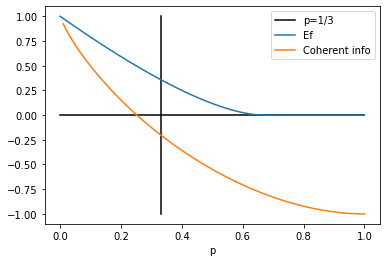

We can clearly see that Ef tells us the Wernser state is entagneled, while coherent information does not detect the state!


In [3]:
# Functions defined in previous notebook:
def rhoW(p):
  return 1/4*np.array([[2-p,0,0,2*(1-p)],[0,p,0,0],[0,0,p,0],[2*(1-p),0,0,2-p]])

def EF(p):
  Ef=np.zeros(len(p))
  for i in range(len(p)):
    eig,v=LA.eig(rhoW(p[i]))
    concurrence=np.maximum(0,eig[0]-eig[1]-eig[2]-eig[3])
    x=(1+np.sqrt(1-concurrence**2))/2
    Ef[i]=np.nan_to_num(-x*np.log2(x) - (1-x)*np.log2(1-x)) # Nan_to_num makes sure the 0*log(0) is handeled correctly
  return Ef

# Compute coherent information
def coherentInformation(p):
  return 1+(1-3*p/4)*np.log2((1-3*p/4)) + 3/4*p*np.log2(p/4) #The eigenvalues are computed by hand for both rho and tr_A(rho)

# Compute entangelment of formation and conherent information
n=100 # Number of points to compute
p=np.linspace(0,1,n)
Ef=EF(p)
cohInfo=coherentInformation(p)

plt.plot(p,0*p,c="k")
plt.plot(np.ones(10)*1/3,np.linspace(-1,1,10),c="k",label="p=1/3")
plt.plot(p,Ef, label="Ef")
plt.plot(p,cohInfo,label='Coherent info')
plt.xlabel('p')
plt.legend()
plt.show()
print(f'We can clearly see that Ef tells us the Wernser state is entagneled, while coherent information does not detect the state!')